In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [208]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

In [209]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

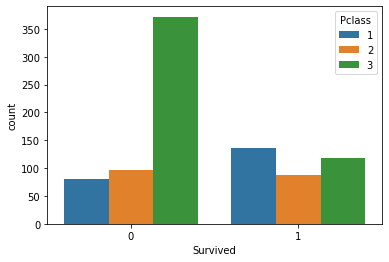

In [211]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

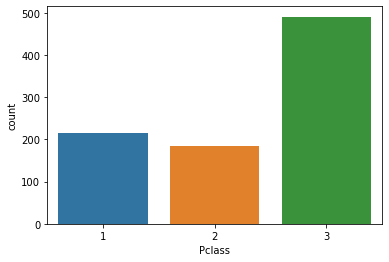

In [212]:
sns.countplot(x = 'Pclass', data = titanic_train)

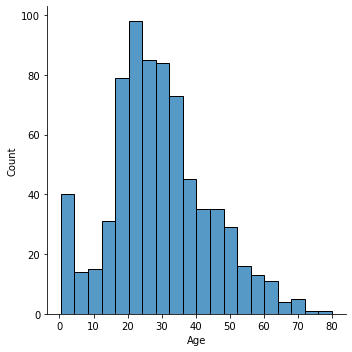

In [213]:
sns.displot(titanic_train['Age'].dropna(), kde =False)

<AxesSubplot:>

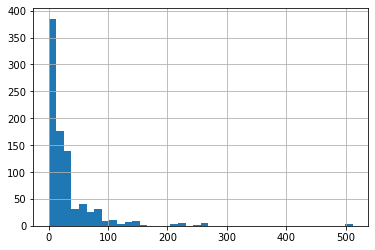

In [214]:
titanic_train['Fare'].hist(bins=40)

In [215]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

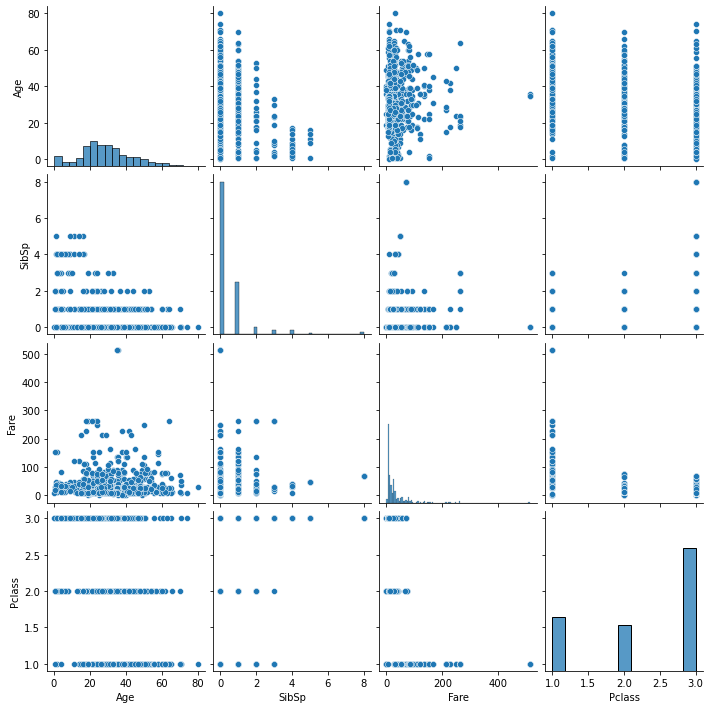

In [216]:
sns.pairplot(titanic_train[['Age', 'SibSp','Fare','Pclass']])

In [217]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [218]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute, axis=1)

In [219]:
titanic_train.drop('Cabin',axis=1,inplace=True)

In [220]:
titanic_train['Embarked'].dropna(inplace=True)

In [221]:
Embarked_d = pd.get_dummies(titanic_train['Embarked'], drop_first=True)
Sex_d = pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [222]:
titanic_train = pd.concat([titanic_train, Embarked_d, Sex_d], axis=1)

In [223]:
titanic_train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [224]:
titanic_train.drop('PassengerId', axis=1, inplace=True)

In [225]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [226]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'male'],
      dtype='object')

In [227]:
X_train = titanic_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'male']]
y_train = titanic_train['Survived']

In [228]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [229]:
titanic_test['Age'] = titanic_test[['Age', 'Pclass']].apply(impute, axis=1)

In [230]:
titanic_test.drop('Cabin',axis=1,inplace=True)

In [231]:
titanic_test['Embarked'].dropna(inplace=True)

In [232]:
Embarked_ds = pd.get_dummies(titanic_test['Embarked'], drop_first=True)
Sex_ds = pd.get_dummies(titanic_test['Sex'], drop_first=True)

In [233]:
titanic_test = pd.concat([titanic_test, Embarked_ds, Sex_ds], axis=1)

In [234]:
titanic_test.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [235]:
mean = titanic_test['Fare'].dropna(axis=0).mean()
mean

35.6271884892086

In [236]:
titanic_test['Fare'].loc[[152]] = mean

C:\Users\mina.aziz\AppData\Local\Temp\ipykernel_19476\554190912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test['Fare'].loc[[152]] = mean


In [237]:
titanic_test[titanic_test['Fare'].isna()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male


In [238]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


In [239]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'male'],
      dtype='object')

In [240]:
X_test = titanic_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'male']]

In [241]:
log = LogisticRegression()

In [242]:
log.fit(X_train,y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [243]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
male           0
dtype: int64

In [244]:
predictions = log.predict(X_test)

In [245]:
len(predictions)

418

In [250]:
df_Pred = pd.DataFrame(predictions, columns = ['Survived'])

In [247]:
df_PassengerId = titanic_test['PassengerId']

In [251]:
df_Pred= pd.concat([df_PassengerId, df_Pred], axis=1)

In [252]:
df_Pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [253]:
df_Pred.to_csv('Titanic_final.csv',index=False)